# 1. Data Exploration and Cleaning 


Data Exploration and Cleaning involves examining and refining raw data to ensure its quality and usability for analysis. This includes tasks like reviewing data, calculating summary statistics, visualizing patterns, handling missing values and outliers, and correcting errors. It's a crucial step that lays the foundation for meaningful analysis by ensuring data accuracy and reliability.

In [49]:
# importing libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.stats import f_oneway, chi2_contingency
import warnings
warnings.filterwarnings("ignore")

In [51]:
#loading the dataset
df = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\Datasets\Project 1 Sheet.csv")
df

,CustomerID,Age,Gender,AnnualIncome,PurchaseHistory
0,1,24,Male,45000,30
1,2,52,Female,85000,45
2,3,35,Female,60000,24
3,4,46,Male,75000,50
4,5,29,Female,32000,12
5,6,41,Male,65000,36
6,7,38,Female,72000,22
7,8,30,Male,48000,18
8,9,27,Female,54000,29
9,10,50,Male,83000,41


In [52]:
#Getting the basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       10 non-null     int64 
 1   Age              10 non-null     int64 
 2   Gender           10 non-null     object
 3   AnnualIncome     10 non-null     int64 
 4   PurchaseHistory  10 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 532.0+ bytes


In [53]:
#Getting the first 5 dataframes
df.head()

,CustomerID,Age,Gender,AnnualIncome,PurchaseHistory
0,1,24,Male,45000,30
1,2,52,Female,85000,45
2,3,35,Female,60000,24
3,4,46,Male,75000,50
4,5,29,Female,32000,12


In [54]:
#Generating descriptive statistics of numerical columns
df.describe()

,CustomerID,Age,AnnualIncome,PurchaseHistory
count,10.00000,10.000000,10.000000,10.000000
mean,5.50000,37.200000,61900.000000,30.700000
std,3.02765,9.874771,17323.394587,12.229745
min,1.00000,24.000000,32000.000000,12.000000
25%,3.25000,29.250000,49500.000000,22.500000
50%,5.50000,36.500000,62500.000000,29.500000
75%,7.75000,44.750000,74250.000000,39.750000
max,10.00000,52.000000,85000.000000,50.000000


In [55]:
#Generating datatypes of each column
df.dtypes

CustomerID          int64
Age                 int64
Gender             object
AnnualIncome        int64
PurchaseHistory     int64
dtype: object

In [56]:
#Checking the no. of missing values
df.isnull().sum()

CustomerID         0
Age                0
Gender             0
AnnualIncome       0
PurchaseHistory    0
dtype: int64

There are no missing values present in the dataframe.

In [57]:
#Finding duplicates in the data
df.duplicated().sum()

0

There are no duplicates present in the dataframe.

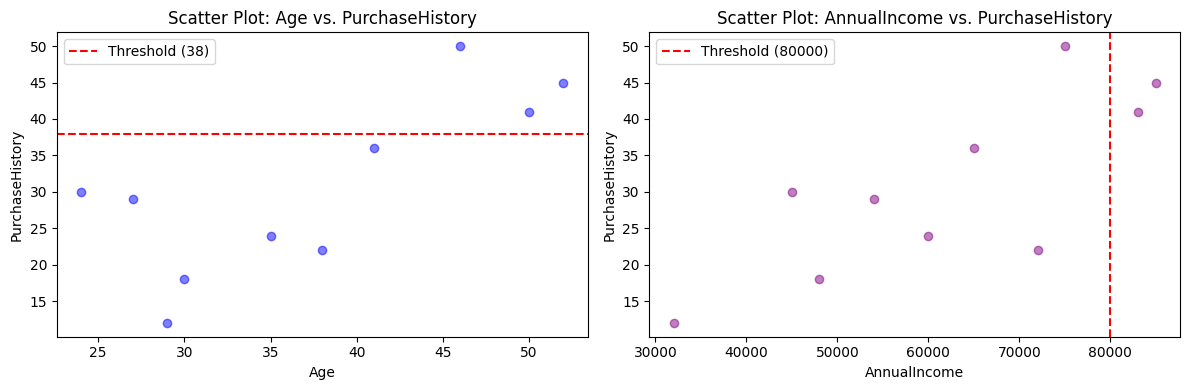

In [58]:
# Checking for Outliners
# Creating scatter plots with threshold lines
plt.figure(figsize=(12, 4))

# Scatter plot for Age vs. PurchaseHistory
plt.subplot(1, 2, 1)
plt.scatter(df['Age'], df['PurchaseHistory'], color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('PurchaseHistory')
plt.title('Scatter Plot: Age vs. PurchaseHistory')

# Adding threshold line for PurchaseHistory
threshold_purchase = 38  # Adjust this threshold as per your requirement
plt.axhline(y=threshold_purchase, color='red', linestyle='--', label=f'Threshold ({threshold_purchase})')
plt.legend()

# Scatter plot for AnnualIncome vs. PurchaseHistory
plt.subplot(1, 2, 2)
plt.scatter(df['AnnualIncome'], df['PurchaseHistory'], color='purple', alpha=0.5)
plt.xlabel('AnnualIncome')
plt.ylabel('PurchaseHistory')
plt.title('Scatter Plot: AnnualIncome vs. PurchaseHistory')

# Adding threshold line for AnnualIncome
threshold_income = 80000  # Adjust this threshold as per your requirement
plt.axvline(x=threshold_income, color='red', linestyle='--', label=f'Threshold ({threshold_income})')
plt.legend()

plt.tight_layout()
plt.show()


# 2. FEATURE ENGINEERING

Feature Engineering is the process of transforming raw data into informative features that enhance the performance of machine learning models. This involves creating new features, selecting relevant ones, and transforming existing ones to improve model accuracy and interpretability. Feature engineering plays a crucial role in building effective predictive models by capturing meaningful patterns and relationships in the data, ultimately leading to better predictions and insights.

In [59]:
#Creating new features such as total spend, average transaction value, and purchase frequency.
df['Total_Spend'] = df[['PurchaseHistory']].sum(axis=1)
df['Avg_Transaction_Value'] = df[['PurchaseHistory']].mean(axis=1)
df['Purchase_Frequency'] = df.filter(like='Purchase').count(axis=1)
df


,CustomerID,Age,Gender,AnnualIncome,PurchaseHistory,Total_Spend,Avg_Transaction_Value,Purchase_Frequency
0,1,24,Male,45000,30,30,30.0,1
1,2,52,Female,85000,45,45,45.0,1
2,3,35,Female,60000,24,24,24.0,1
3,4,46,Male,75000,50,50,50.0,1
4,5,29,Female,32000,12,12,12.0,1
5,6,41,Male,65000,36,36,36.0,1
6,7,38,Female,72000,22,22,22.0,1
7,8,30,Male,48000,18,18,18.0,1
8,9,27,Female,54000,29,29,29.0,1
9,10,50,Male,83000,41,41,41.0,1


Total spend: We calculate the total spend by summing up the 'PurchaseHistory' for all customers and assign it to the new 'TotalSpend' column.

Average transaction value: We calculate the average transaction value by dividing the total spend by the total number of customers.

Purchase frequency: We assume the purchase frequency to be the total number of purchases made by all customers. In this example, we're considering all purchases as a single entity.

After creating the new features, we explore them by printing their summary statistics. We calculate the total spend by all customers, the average transaction value, and the total purchase frequency.

# 3. Exploratory Data Analysis (EDA)

# Distribution Analysis:

Distribution analysis in Exploratory Data Analysis (EDA) involves examining the frequency distribution of individual variables in the dataset. This helps us understand the range, spread, and shape of the data, which can reveal insights into the underlying patterns and trends. We use visualization techniques such as histograms, kernel density plots, and boxplots to explore the distribution of variables.

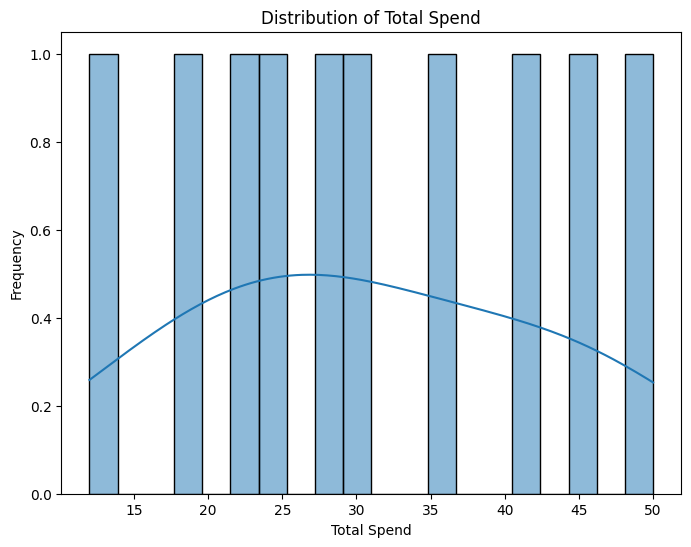

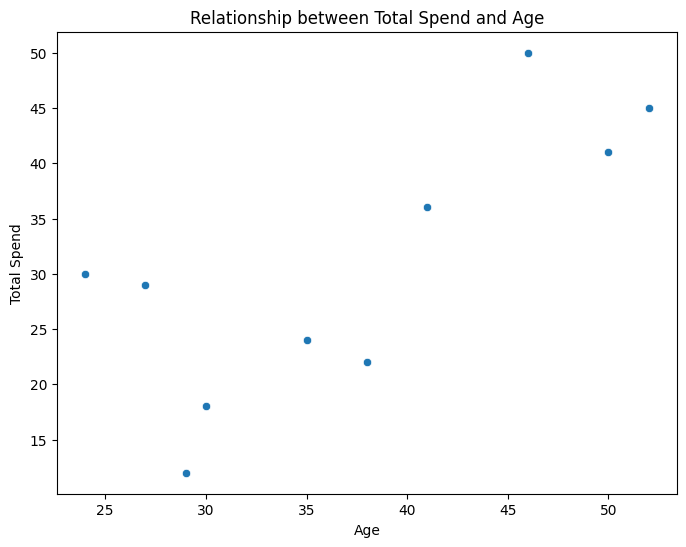

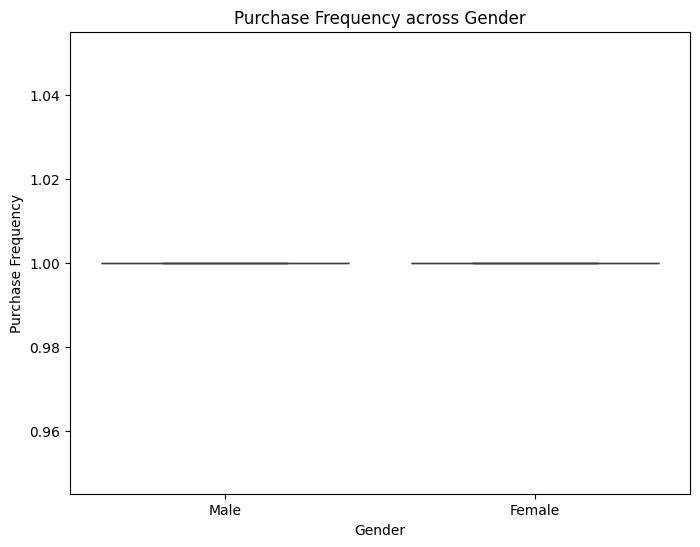

In [60]:
# Visualizing the distribution of Total Spend
plt.figure(figsize=(8, 6))
sns.histplot(df['Total_Spend'], bins=20, kde=True)
plt.title('Distribution of Total Spend')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.show()

# Visualizing the relationship between Total Spend and Age
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Total_Spend')
plt.title('Relationship between Total Spend and Age')
plt.xlabel('Age')
plt.ylabel('Total Spend')
plt.show()

# Comparing Purchase Frequency across different genders
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Purchase_Frequency')
plt.title('Purchase Frequency across Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Frequency')
plt.show()


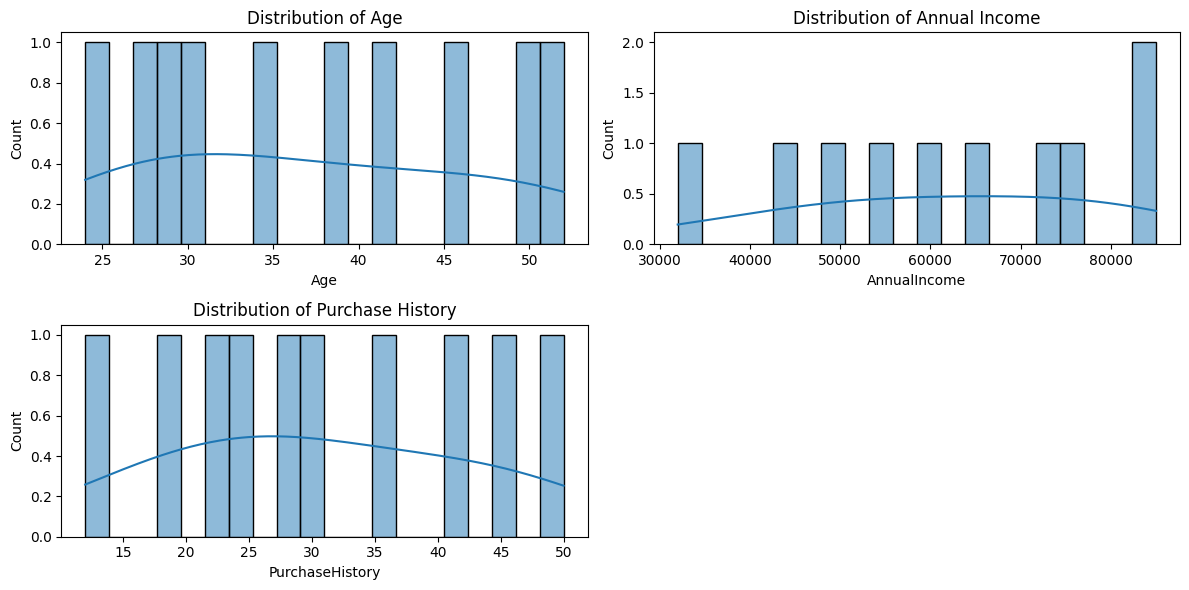

In [61]:
# Distribution analysis
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
sns.histplot(df['AnnualIncome'], bins=20, kde=True)
plt.title('Distribution of Annual Income')

plt.subplot(2, 2, 3)
sns.histplot(df['PurchaseHistory'], bins=20, kde=True)
plt.title('Distribution of Purchase History')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Count')

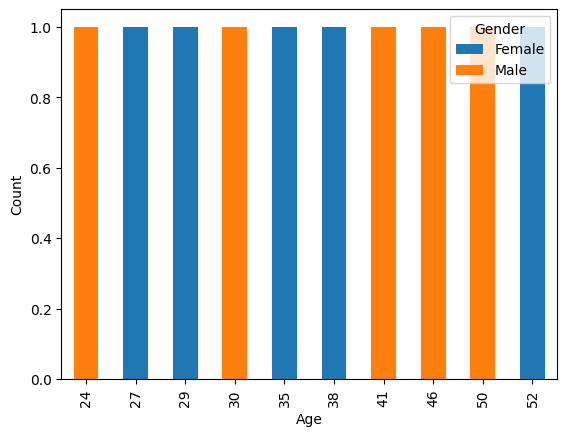

In [62]:
# Visualization of Count of Customers by Age and Gender
df.groupby(['Age', 'Gender']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Age')
plt.ylabel('Count')

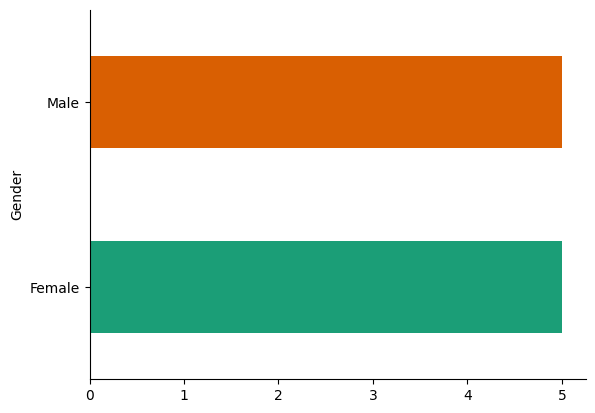

In [63]:
# Visualization of Customer Distribution by Gender
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: ylabel='Total_Spend'>

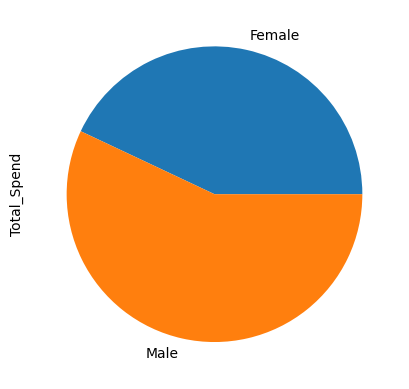

In [64]:
# Total Spending by Gender
df.groupby('Gender')['Total_Spend'].sum().plot(kind='pie')

<Axes: xlabel='Age', ylabel='Total_Spend'>

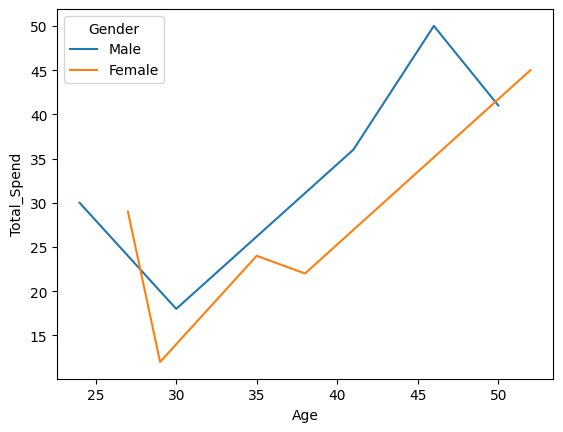

In [65]:
# Relationship between Age, Total Spending, and Gender
sns.lineplot(x = 'Age', y = 'Total_Spend', hue = 'Gender', data = df)

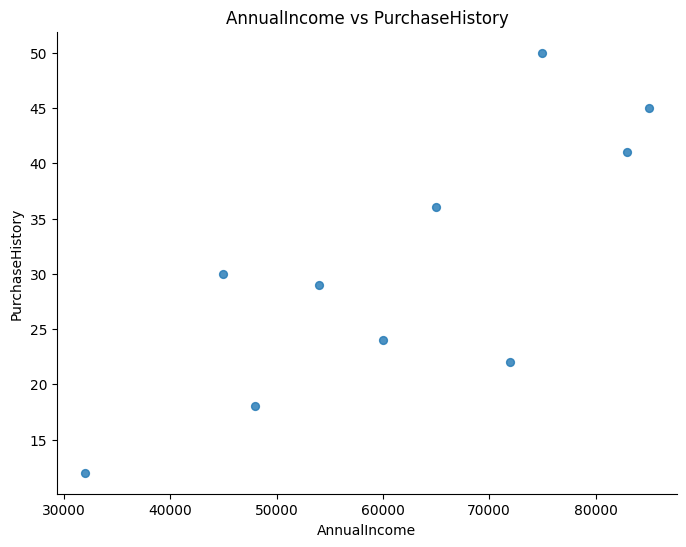

In [66]:
# Scatter plot of AnnualIncome vs PurchaseHistory 
plt.figure(figsize=(8, 6))
plt.scatter(df['AnnualIncome'], df['PurchaseHistory'], s=32, alpha=0.8)
plt.title('AnnualIncome vs PurchaseHistory')
plt.xlabel('AnnualIncome')
plt.ylabel('PurchaseHistory')
plt.gca().spines['top'].set_visible(False)  # Remove top spine
plt.gca().spines['right'].set_visible(False)  # Remove right spine
plt.show()

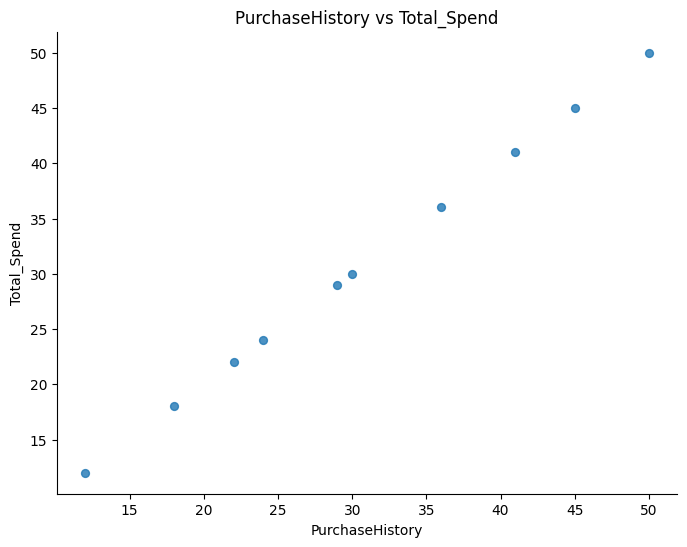

In [67]:
# Plotting PurchaseHistory vs Total_Spend
plt.figure(figsize=(8, 6))
plt.scatter(df['PurchaseHistory'], df['Total_Spend'], s=32, alpha=0.8)
plt.title('PurchaseHistory vs Total_Spend')
plt.xlabel('PurchaseHistory')
plt.ylabel('Total_Spend')
plt.gca().spines['top'].set_visible(False)  # Remove top spine
plt.gca().spines['right'].set_visible(False)  # Remove right spine
plt.show()

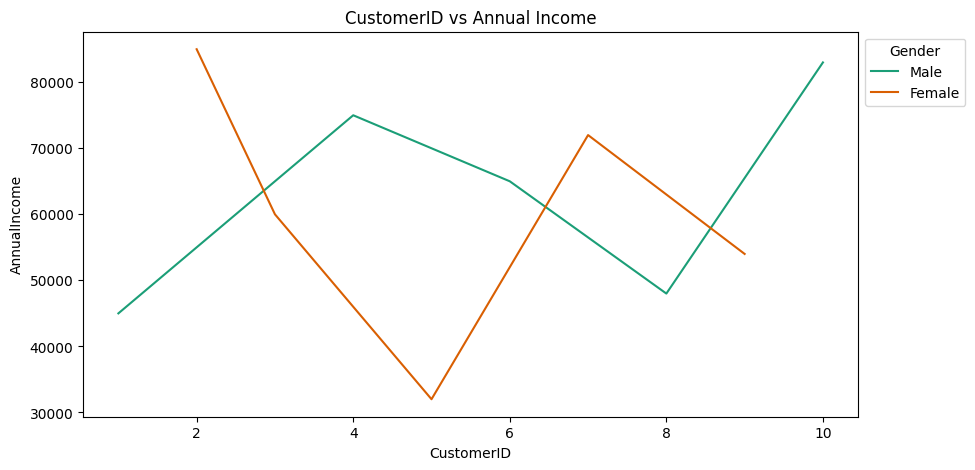

In [68]:
# CustomerID vs Annual Income
# Sorting the DataFrame by CustomerID
df_sorted = df.sort_values('CustomerID')

# Setting figure size
plt.figure(figsize=(10, 5))

# Plotting CustomerID vs Annual Income using Seaborn's lineplot
sns.lineplot(data=df_sorted, x='CustomerID', y='AnnualIncome', hue='Gender', palette='Dark2')

# Seting labels and title
plt.xlabel('CustomerID')
plt.ylabel('AnnualIncome')
plt.title('CustomerID vs Annual Income')

# Placing legend outside the plot area
plt.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')

# Display the plot
plt.show()


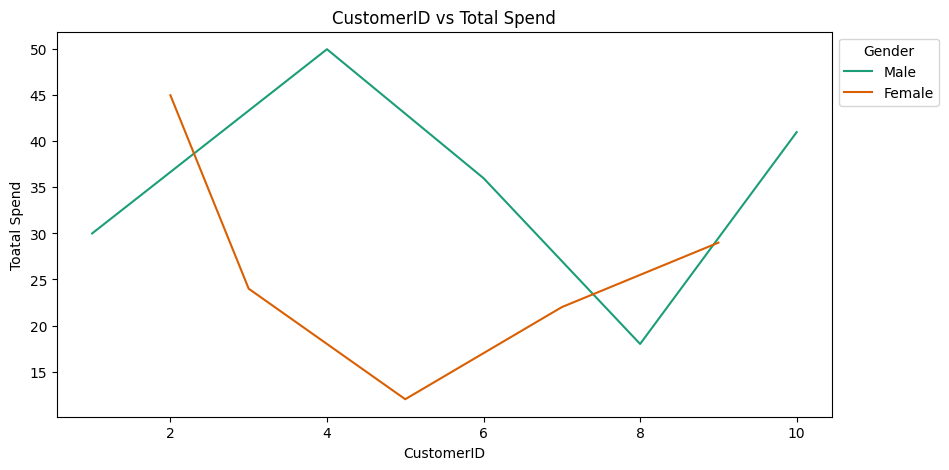

In [69]:
# Sort the DataFrame by CustomerID
df_sorted = df.sort_values('CustomerID')

# Setting figure size
plt.figure(figsize=(10, 5))

# Plotting CustomerID vs Toatal Spend using Seaborn's lineplot
sns.lineplot(data=df_sorted, x='CustomerID', y='Total_Spend', hue='Gender', palette='Dark2')

# Seting labels and title
plt.xlabel('CustomerID')
plt.ylabel('Toatal Spend')
plt.title('CustomerID vs Total Spend')
plt.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')  # Place legend outside the plot area

# Display the plot
plt.show()

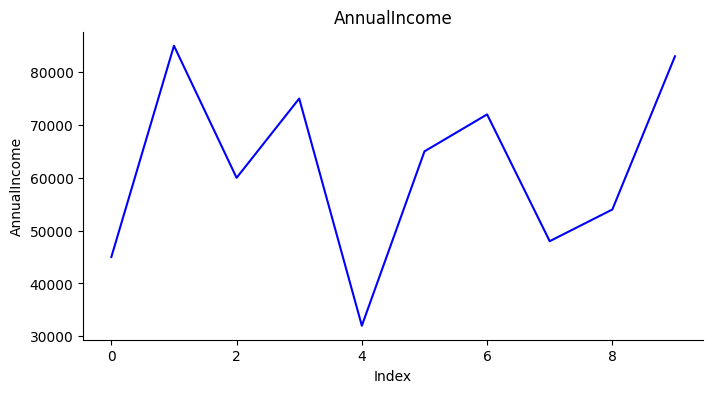

In [70]:
# Plotting AnnualIncome using matplotlib
plt.figure(figsize=(8, 4))
plt.plot(df['AnnualIncome'], color='blue')
plt.title('AnnualIncome')
plt.xlabel('Index')
plt.ylabel('AnnualIncome')
plt.gca().spines['top'].set_visible(False)  # Remove top spine
plt.gca().spines['right'].set_visible(False)  # Remove right spine
plt.show()

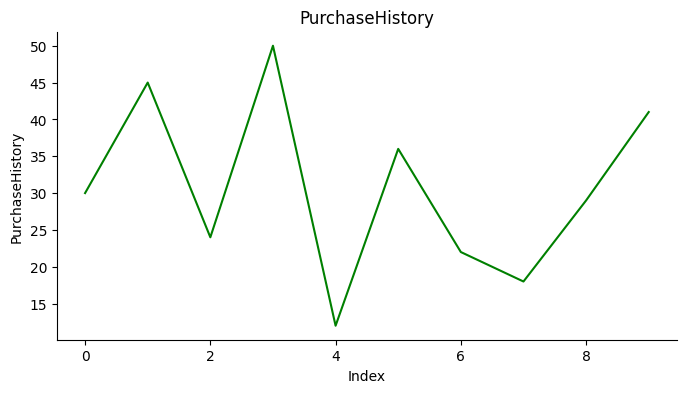

In [71]:
# Plotting PurchaseHistory using matplotlib
plt.figure(figsize=(8, 4))
plt.plot(df['PurchaseHistory'], color='green')
plt.title('PurchaseHistory')
plt.xlabel('Index')
plt.ylabel('PurchaseHistory')
plt.gca().spines['top'].set_visible(False)  # Remove top spine
plt.gca().spines['right'].set_visible(False)  # Remove right spine
plt.show()

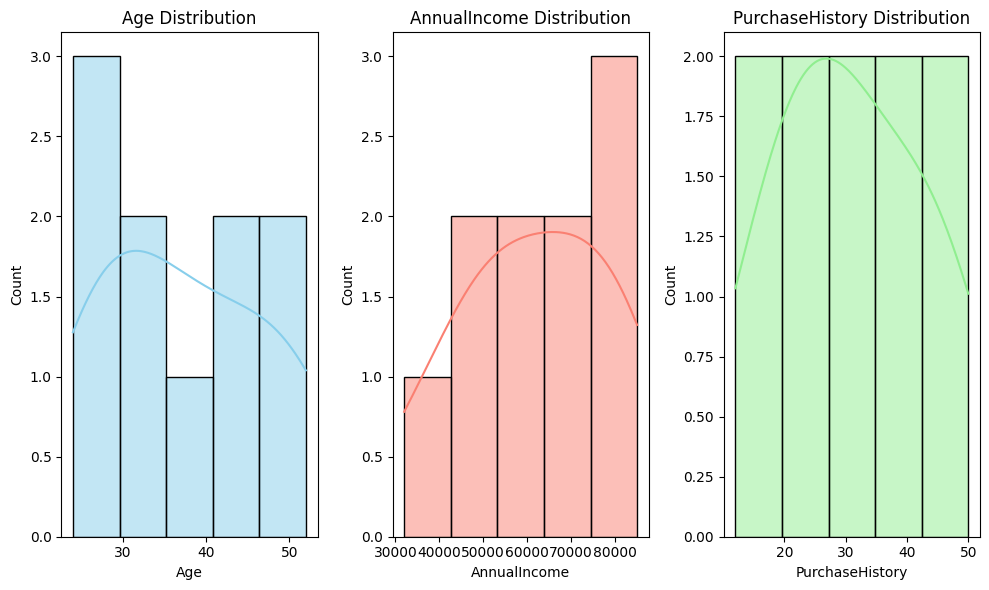

In [72]:
# Creating distribution plots
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
sns.histplot(df["Age"], kde=True, color='skyblue')
plt.title("Age Distribution")

plt.subplot(1, 3, 2)
sns.histplot(df["AnnualIncome"], kde=True, color='salmon')
plt.title("AnnualIncome Distribution")

plt.subplot(1, 3, 3)
sns.histplot(df["PurchaseHistory"], kde=True, color='lightgreen')
plt.title("PurchaseHistory Distribution")

plt.tight_layout()
plt.show()

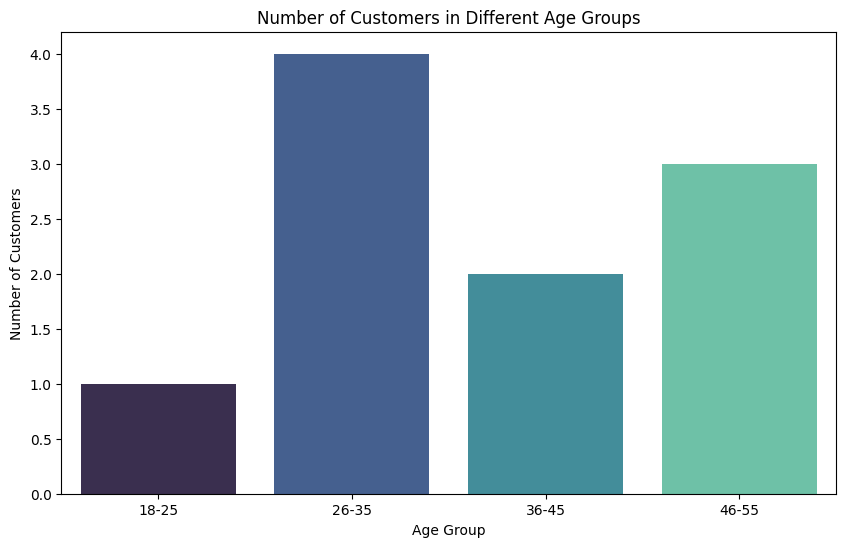

In [73]:
# Bin ages into categories
bins = [18, 25, 35, 45, 55]
labels = ["18-25", "26-35", "36-45", "46-55"]
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Counting the number of customers in each age group
age_counts = df['Age_Group'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age_Group', order=labels, palette='mako')
plt.title("Number of Customers in Different Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.show()

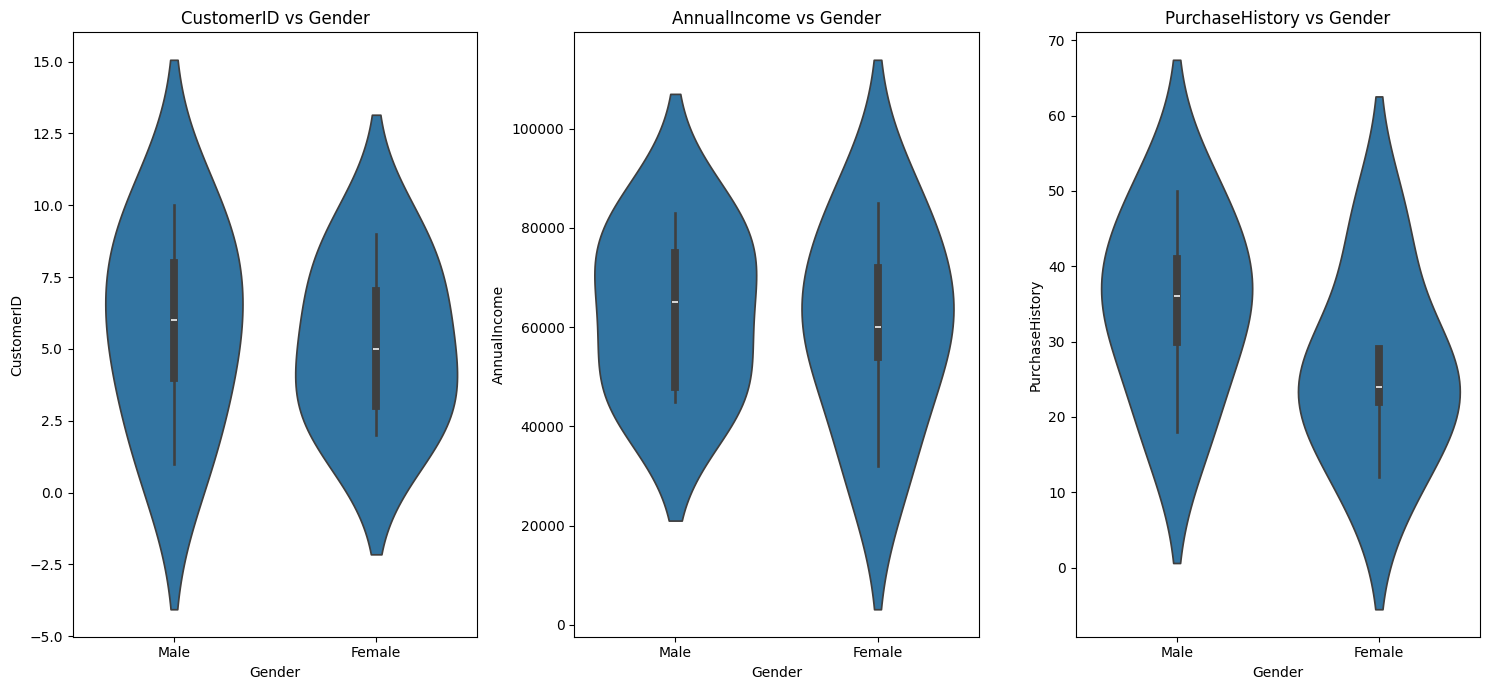

In [74]:
# Setting up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 7))

# List of features and corresponding titles
features = ['CustomerID', 'AnnualIncome', 'PurchaseHistory']
titles = ['CustomerID vs Gender', 'AnnualIncome vs Gender', 'PurchaseHistory vs Gender']

# Loop through features and titles to create violin plots
for i, (col, title) in enumerate(zip(features, titles)):
    sns.violinplot(x='Gender', y=col, data=df, ax=axes[i])
    axes[i].set_title(title)

plt.tight_layout()
plt.show()

# Correlation Analysis:

Correlation analysis is a statistical method used to measure the strength and direction of relationships between variables. It quantifies how changes in one variable are associated with changes in another. The correlation coefficient ranges from -1 to +1, where values closer to +1 or -1 indicate stronger relationships. Correlation analysis helps identify patterns, dependencies, and potential insights in datasets. However, it's important to note that correlation does not imply causation, and additional analysis is often required to understand underlying factors.

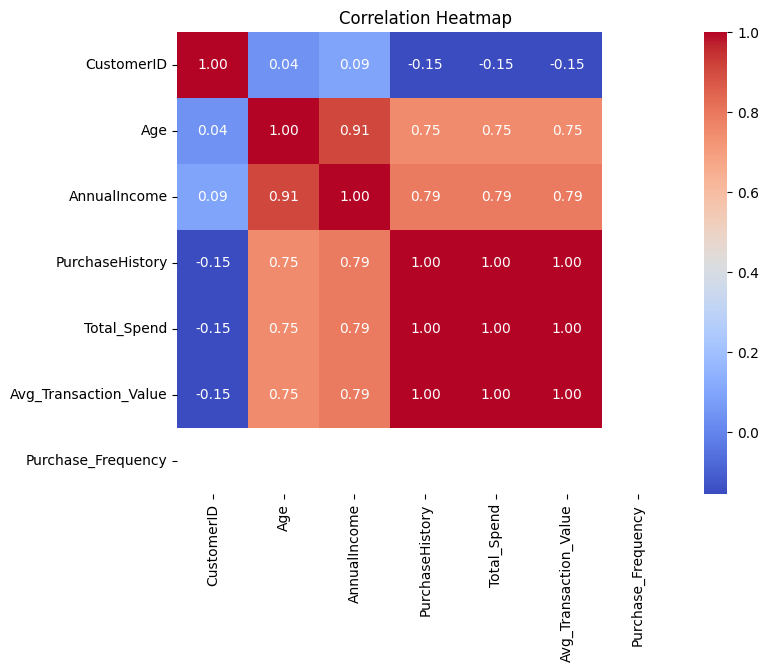

In [75]:

# Selecting only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Computing the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# 4. Customer Segmentation with Machine Learning

# K-Means Clustering: 
K-means clustering is a popular technique used in customer segmentation to group similar customers together based on their attributes or behavior. It partitions customers into distinct clusters, allowing businesses to better understand their customer base and tailor marketing strategies to different segments. By identifying common characteristics among customers within each cluster, companies can personalize their offerings, improve customer satisfaction, and enhance overall business performance.

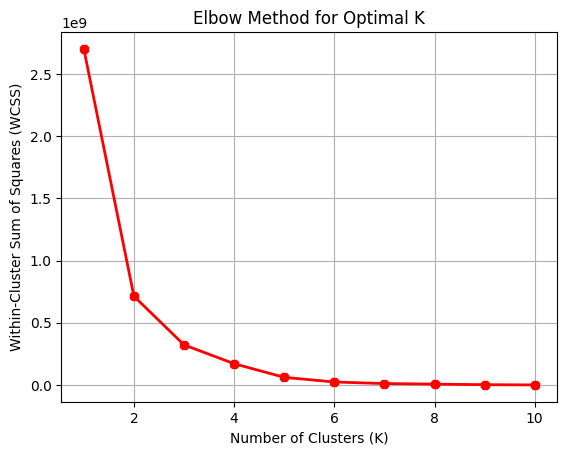

In [76]:
from sklearn.cluster import KMeans

X1 = df.loc[:, ["Age", "AnnualIncome"]].values
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()

In [77]:
# Defining the number of clusters
k = 4

# Initializing KMeans model with the specified number of clusters
kmeans = KMeans(n_clusters=k, init="k-means++")

# Fitting the KMeans model and predict cluster labels
label = kmeans.fit_predict(X1)

# Printing the cluster labels
print(label)

[1 0 2 0 3 2 2 1 1 0]


In [78]:
# Fitting the KMeans model to the data
kmeans.fit(X1)

# Obtaining the cluster centers
cluster_centers = kmeans.cluster_centers_

# Printing the cluster centers
print(cluster_centers)

[[2.70000000e+01 4.90000000e+04]
 [4.93333333e+01 8.10000000e+04]
 [3.80000000e+01 6.56666667e+04]
 [2.90000000e+01 3.20000000e+04]]


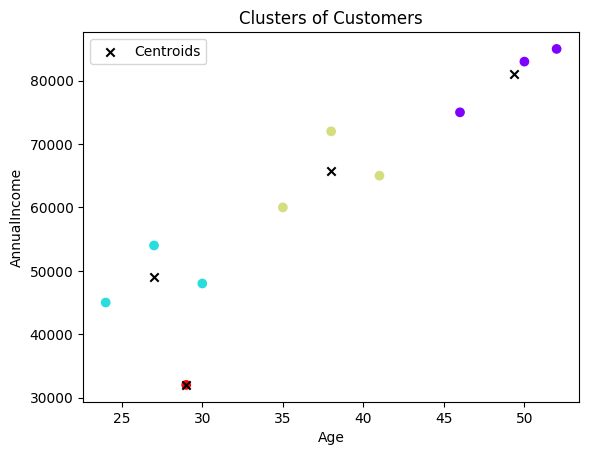

In [79]:

# Plotting the data points with cluster assignments
plt.scatter(X1[:, 0], X1[:, 1], c=label, cmap='rainbow')

# Plotting the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='black', marker='x', label='Centroids')

# Setting plot title and labels
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('AnnualIncome')
plt.legend()

# Display the plot
plt.show()

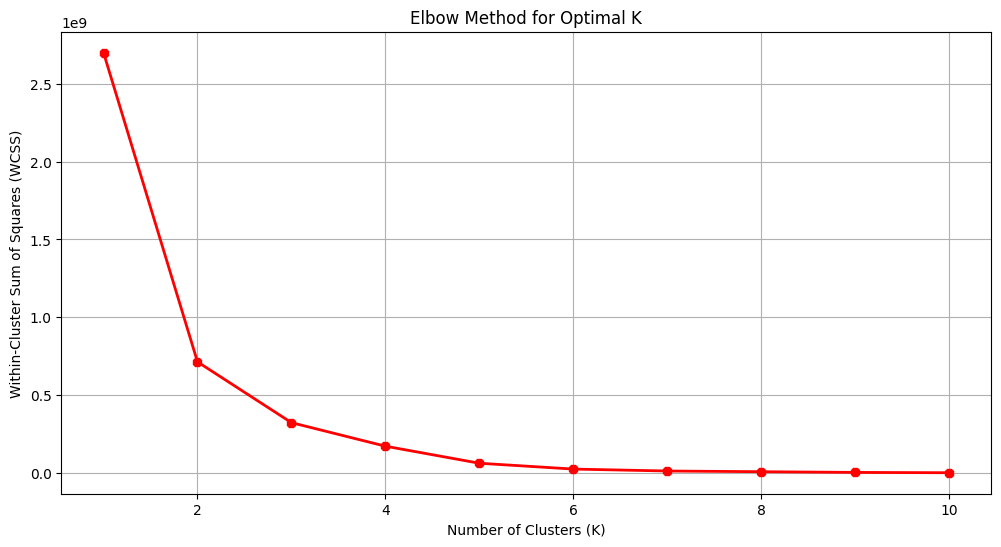

In [80]:
from sklearn.cluster import KMeans

# Data preparation
X2 = df.loc[:, ["AnnualIncome", "PurchaseHistory"]].values

# Elbow Method for Optimal K
WCSS = [KMeans(n_clusters=k, init="k-means++").fit(X2).inertia_ for k in range(1, 11)]

# Plotting the Elbow Curve
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), WCSS, linewidth=2, color="red", marker="8")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()

In [81]:
# Defining the number of clusters
k = 2

# Initializing KMeans model with the specified number of clusters
label = KMeans(n_clusters=k, init="k-means++").fit_predict(X2)

# Printing the cluster labels
print(label)

[1 0 1 0 1 0 0 1 1 0]


In [82]:
# Fitting the KMeans model to the data
kmeans.fit(X2)

# Obtaining the cluster centers
cluster_centers = kmeans.cluster_centers_

# Printing the cluster centers
print(cluster_centers)

[[6.56666667e+04 2.73333333e+01]
 [4.90000000e+04 2.56666667e+01]
 [8.10000000e+04 4.53333333e+01]
 [3.20000000e+04 1.20000000e+01]]


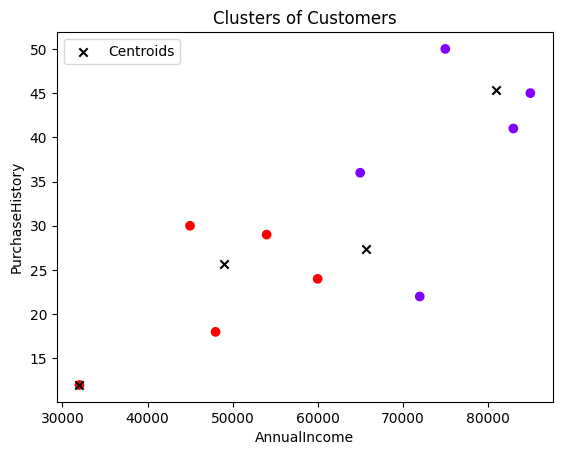

In [83]:
# Plotting the data points with cluster assignments
plt.scatter(X2[:, 0], X2[:, 1], c=label, cmap='rainbow')

# Plotting the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='black', marker='x', label='Centroids')

# Setting plot title and labels
plt.title('Clusters of Customers')
plt.xlabel('AnnualIncome')
plt.ylabel('PurchaseHistory')
plt.legend()

# Display the plot
plt.show()

In [84]:
# Converting the 'Gender' column to numeric values
df['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)

# Reassigning X3
X3 = df.iloc[:, 1:]

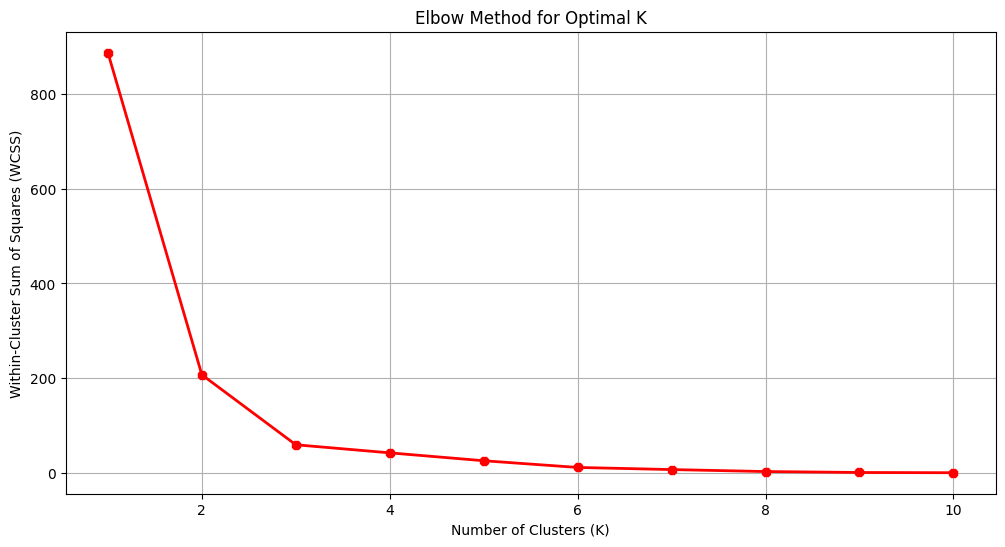

In [85]:
from sklearn.preprocessing import LabelEncoder

# Encoding the 'Age_Group' column
label_encoder = LabelEncoder()
df['Age_Group_Encoded'] = label_encoder.fit_transform(df['Age_Group'])

# Selecting the features for clustering
X3 = df[['Age', 'Age_Group_Encoded']]

# Performing KMeans clustering
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X3)
    WCSS.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), WCSS, linewidth=2, color="red", marker="8")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()


In [86]:
# Specifying the number of clusters
num_clusters = 3

# Initializing KMeans with the specified number of clusters
kmeans = KMeans(n_clusters=num_clusters)

# Fitting the KMeans model and predict cluster labels
label = kmeans.fit_predict(X2)

# Printing cluster labels
print(label)


[2 1 0 1 2 0 1 2 0 1]


In [87]:
# Accessing the cluster centers from the trained KMeans model
cluster_centers = kmeans.cluster_centers_

# Printing the cluster centers
print(cluster_centers)


[[5.96666667e+04 2.96666667e+01]
 [7.87500000e+04 3.95000000e+01]
 [4.16666667e+04 2.00000000e+01]]


In [88]:
# Performing KMeans clustering and store the labels in 'clusters'
kmeans = KMeans(n_clusters=3)  # Define the number of clusters
clusters = kmeans.fit_predict(df[['Age', 'AnnualIncome', 'PurchaseHistory']])

# Assigning cluster labels to the DataFrame
df["label"] = clusters

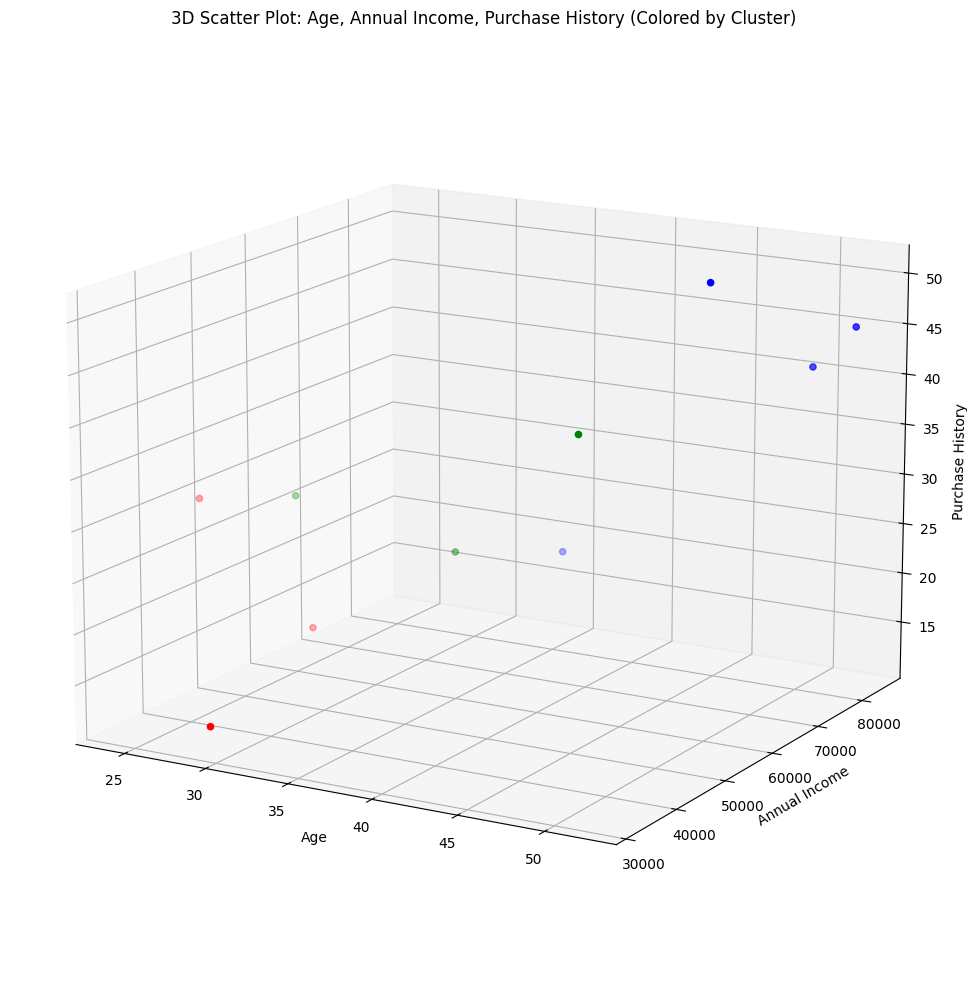

In [89]:
from mpl_toolkits.mplot3d import Axes3D

# Creating a 3D figure and axis
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
colors = ['blue', 'red', 'green', 'orange', 'purple']
for label in df['label'].unique():
    ax.scatter(df.Age[df.label == label], df["AnnualIncome"][df.label == label], df["PurchaseHistory"][df.label == label], c=colors[label])

# Adding labels and title
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income")
ax.set_zlabel("Purchase History")
ax.set_title("3D Scatter Plot: Age, Annual Income, Purchase History (Colored by Cluster)")

ax.view_init(elev=15, azim=-60)  # Customize the viewing angle (elevation and azimuth)
plt.tight_layout()  # Adjust spacing between plot elements

plt.show()


# Silhouette Score :

The silhouette score is a measure used to evaluate the quality of clusters formed during customer segmentation. It quantifies how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters, suggesting a good clustering. In customer segmentation, a higher silhouette score implies that the identified clusters are distinct and well-separated, providing valuable insights into customer behavior and preferences.

In [90]:
# Assigning cluster labels to the DataFrame
df["label"] = clusters

# Calculating the silhouette score
silhouette_score_value = silhouette_score(X3, df["label"])

print("Silhouette Score:", silhouette_score_value)


Silhouette Score: 0.16378937104894878


# Statistical Analysis

# ANOVA :

ANOVA (Analysis of Variance) is a statistical test used to analyze the differences among means of two or more groups. It assesses whether there are statistically significant differences between the means of the groups based on the variance in the data. ANOVA compares the variation between groups to the variation within groups, helping to determine if there is a significant difference in means across the groups. In the context of statistical analysis, ANOVA can be used to compare means across different customer segments or groups to identify significant differences in various features or attributes.

In [91]:
from scipy.stats import f_oneway, chi2_contingency

# Assuming you have a DataFrame 'df' containing customer data with different segments
numerical_columns = ['AnnualIncome', 'PurchaseHistory']
categorical_columns = ['Gender']
label_column = 'label'  # Assuming 'label' is the column containing cluster labels

# Step 3: ANOVA Test for Numerical Columns
print("ANOVA Results:")
for column in numerical_columns:
    segment_groups = []
    for label, group in df.groupby(label_column):
        segment_groups.append(group[column].values)
    
    # Perform ANOVA
    anova_result = f_oneway(*segment_groups)
    
       # Print ANOVA results
    print()
    print(f"Column: {column}")
    print("F-statistic:", anova_result.statistic)
    print("p-value:", anova_result.pvalue)
    
    # Perform significance check based on p-value
    if anova_result.pvalue < 0.05:  # Significance level (adjust as needed)
        print(f"There is a statistically significant difference in {column} across segments (p < 0.05).")
    else:
        print(f"There is no statistically significant difference in {column} across segments (p >= 0.05).")




ANOVA Results:

Column: AnnualIncome
F-statistic: 25.850012936610593
p-value: 0.000585610851500209
There is a statistically significant difference in AnnualIncome across segments (p < 0.05).

Column: PurchaseHistory
F-statistic: 3.331343644272595
p-value: 0.09626461780913695
There is no statistically significant difference in PurchaseHistory across segments (p >= 0.05).


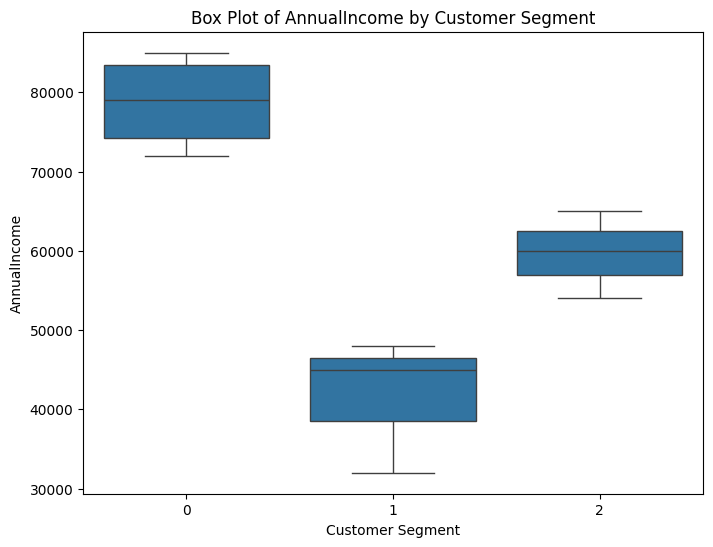

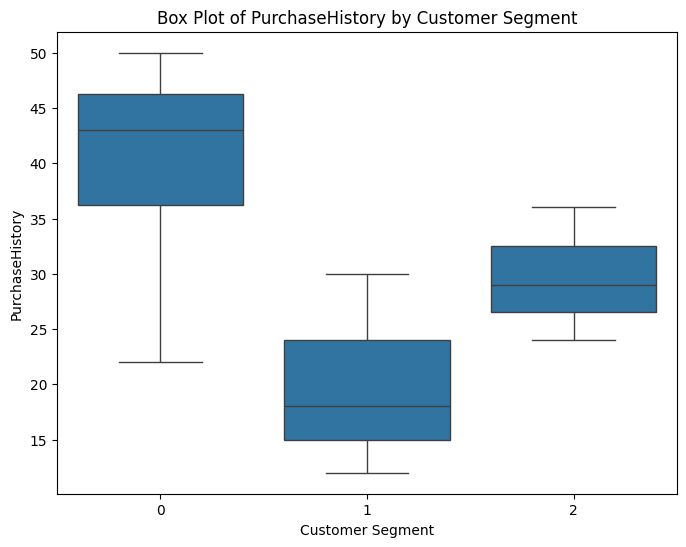

In [92]:

# Box plot for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='label', y=column, data=df)
    plt.title(f'Box Plot of {column} by Customer Segment')
    plt.xlabel('Customer Segment')
    plt.ylabel(column)
    plt.show()


# Chi-Square Test :


The chi-square test is a statistical method used to determine if there is a significant association between two categorical variables. It compares the observed frequencies of categories in a contingency table to the expected frequencies under the null hypothesis of independence between the variables. In the context of statistical analysis, the chi-square test can be used to examine relationships between categorical variables, such as customer segments and demographic attributes, to determine if there is a statistically significant association between them.

In [93]:
print("Chi-Square Test Results:")
for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df['label'])
    
    # Perform Chi-Square test
    chi2_statistic, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Print Chi-Square test results
    print(f"Column: {column}")
    print("Chi-Square statistic:", chi2_statistic)
    print("p-value:", p_value)
    if p_value < 0.05:  # Significance level (adjust as needed)
        print(f"There is a statistically significant difference in the distribution of {column} across segments (p < 0.05).")
    else:
        print(f"There is no statistically significant difference in the distribution of {column} across segments (p >= 0.05).")

Chi-Square Test Results:
Column: Gender
Chi-Square statistic: 0.6666666666666666
p-value: 0.7165313105737892
There is no statistically significant difference in the distribution of Gender across segments (p >= 0.05).


<Figure size 800x600 with 0 Axes>

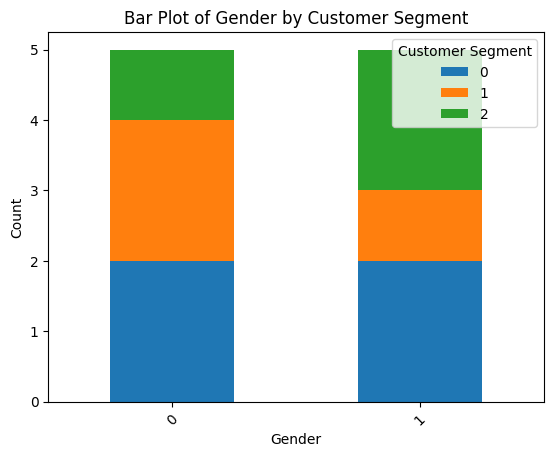

In [94]:
# Bar plot for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    contingency_table = pd.crosstab(df[column], df['label'])
    contingency_table.plot(kind='bar', stacked=True)
    plt.title(f'Bar Plot of {column} by Customer Segment')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Customer Segment', loc='upper right')
    plt.show()
